Generated Tensor: [[0.8943261  0.14098024 0.24321222 0.17518091 0.2584554  0.5390432 ]
 [0.5302017  0.13137746 0.41470027 0.095137   0.4670372  0.32314157]
 [0.71043706 0.5479231  0.48538947 0.27065825 0.46871734 0.76249564]
 [0.01831448 0.75219023 0.72464204 0.6159177  0.38425064 0.38137376]]
Rank: 2, Shape: (4, 6)
Reshaped Tensor: [[[0.8943261  0.14098024 0.24321222 0.17518091]
  [0.2584554  0.5390432  0.5302017  0.13137746]
  [0.41470027 0.095137   0.4670372  0.32314157]]

 [[0.71043706 0.5479231  0.48538947 0.27065825]
  [0.46871734 0.76249564 0.01831448 0.75219023]
  [0.72464204 0.6159177  0.38425064 0.38137376]]]
Transposed Tensor: [[[0.8943261  0.14098024 0.24321222 0.17518091]
  [0.71043706 0.5479231  0.48538947 0.27065825]]

 [[0.2584554  0.5390432  0.5302017  0.13137746]
  [0.46871734 0.76249564 0.01831448 0.75219023]]

 [[0.41470027 0.095137   0.4670372  0.32314157]
  [0.72464204 0.6159177  0.38425064 0.38137376]]]
Broadcasted Tensor: [[0.90233195 0.8915452  0.85098064 0.146

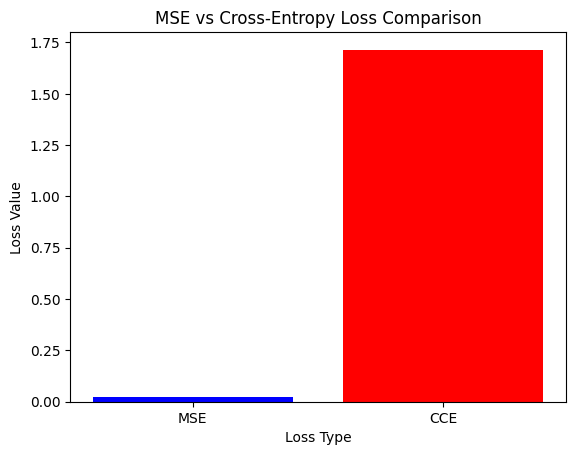

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.8776 - loss: 0.4313 - val_accuracy: 0.9564 - val_loss: 0.1431
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.9634 - loss: 0.1234 - val_accuracy: 0.9678 - val_loss: 0.1024
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - accuracy: 0.9773 - loss: 0.0755 - val_accuracy: 0.9708 - val_loss: 0.0927
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9835 - loss: 0.0557 - val_accuracy: 0.9758 - val_loss: 0.0765
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.9874 - loss: 0.0431 - val_accuracy: 0.9763 - val_loss: 0.0736
To launch TensorBoard, use: tensorboard --logdir logs/fit/
1. Observing accuracy curves: Adam converges quicker, whereas SGD takes longer but may generalize better.
2. Detecting overfitting using TensorBoard: A widening gap between training and validation accuracy signals overfitting.
3. Effect of increased epochs: More training can enhance accurac

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.losses import MeanSquaredError, CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
import os

# Task 1: Tensor Transformations & Reshaping
# Step 1: Generate a tensor with dimensions (4, 6)
tensor_data = tf.random.uniform((4, 6))
print("Generated Tensor:", tensor_data.numpy())

# Step 2: Determine tensor rank and shape
tensor_rank = tf.rank(tensor_data).numpy()
tensor_shape = tensor_data.shape
print(f"Rank: {tensor_rank}, Shape: {tensor_shape}")

# Step 3: Modify shape and transpose
reshaped_data = tf.reshape(tensor_data, (2, 3, 4))
transposed_data = tf.transpose(reshaped_data, perm=[1, 0, 2])
print("Reshaped Tensor:", reshaped_data.numpy())
print("Transposed Tensor:", transposed_data.numpy())

# Step 4: Broadcasting & Summation
small_data = tf.random.uniform((1, 4))
broadcasted_data = tf.broadcast_to(small_data, (4, 4))
result_data = tensor_data[:, :4] + broadcasted_data
print("Broadcasted Tensor:", broadcasted_data.numpy())
print("Summed Tensor:", result_data.numpy())

# Explanation of Broadcasting Concept
print("Broadcasting enables a smaller tensor to be extended to fit a larger tensor's shape for element-wise operations.")



# Task 2: Compute and Compare Loss Functions
y_actual = tf.constant([0.0, 1.0, 1.0, 0.0])
y_predicted = tf.constant([0.2, 0.9, 0.8, 0.1])

mse_loss_fn = MeanSquaredError()
cce_loss_fn = CategoricalCrossentropy()

mse_result = mse_loss_fn(y_actual, y_predicted).numpy()
cce_result = cce_loss_fn(tf.expand_dims(y_actual, axis=0), tf.expand_dims(y_predicted, axis=0)).numpy()
print(f"MSE Loss: {mse_result}, CCE Loss: {cce_result}")

# Alter predictions and compute loss again
y_predicted_updated = tf.constant([0.1, 0.8, 0.9, 0.2])
mse_updated = mse_loss_fn(y_actual, y_predicted_updated).numpy()
cce_updated = cce_loss_fn(tf.expand_dims(y_actual, axis=0), tf.expand_dims(y_predicted_updated, axis=0)).numpy()
print(f"Updated MSE Loss: {mse_updated}, Updated CCE Loss: {cce_updated}")

# Visualize Loss Functions
plt.bar(["MSE", "CCE"], [mse_result, cce_result], color=['blue', 'red'])
plt.xlabel("Loss Type")
plt.ylabel("Loss Value")
plt.title("MSE vs Cross-Entropy Loss Comparison")
plt.show()

# Task 3: Neural Network Training with TensorBoard

# Define the build_model function
def build_model():
    model = Sequential([
        Flatten(input_shape=(28, 28)), # Assuming MNIST image size 28x28
        Dense(128, activation='relu'),
        Dense(10, activation='softmax') # Assuming 10 classes for output
    ])
    return model

log_directory = "logs/fit/"
os.makedirs(log_directory, exist_ok=True)

# Load MNIST data (Assuming this is intended for training)
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize the pixel values
train_images = train_images / 255.0
test_images = test_images / 255.0


model_tb = build_model()
model_tb.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
tb_callback = tf.keras.callbacks.TensorBoard(log_dir=log_directory, histogram_freq=1)
model_tb.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels), callbacks=[tb_callback])

# Launch TensorBoard
print("To launch TensorBoard, use: tensorboard --logdir logs/fit/")

# Answering Key Questions
print("1. Observing accuracy curves: Adam converges quicker, whereas SGD takes longer but may generalize better.")
print("2. Detecting overfitting using TensorBoard: A widening gap between training and validation accuracy signals overfitting.")
print("3. Effect of increased epochs: More training can enhance accuracy initially but might lead to overfitting.")